<a href="https://colab.research.google.com/github/Zulfa-Varvani/ML-things/blob/main/iris_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')

from google.colab import files
uploaded = files.upload()

Saving iris.csv to iris.csv


In [11]:
import io
#read file and display columns
data = pd.read_csv(io.BytesIO(uploaded['iris.csv']))
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [12]:
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [13]:
data.describe()
#don't need cross_val_score since smaller data set and not much cleaning to do, should find relationship however
#can use xgbregressor

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [14]:
#turn all data into numerical (species should be numbered) can use one hot encoder

data['species'].value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: species, dtype: int64

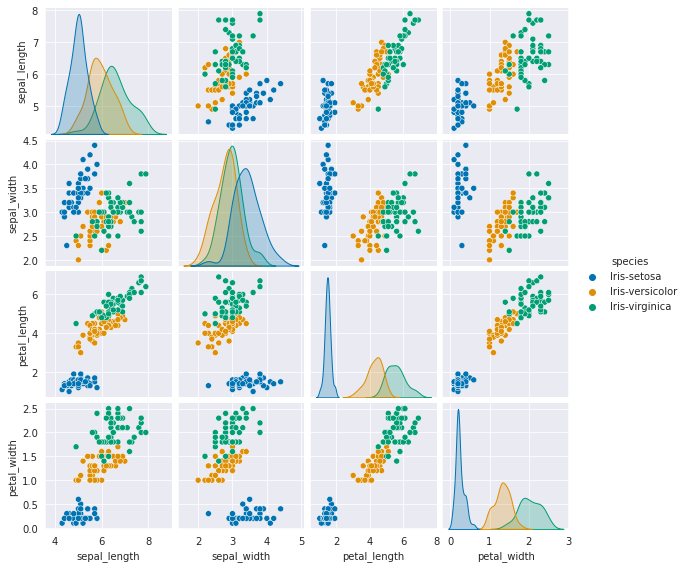

In [15]:
sns.pairplot(data, hue='species', height=2,palette='colorblind')
#petal_length and petal_width are highly correlated

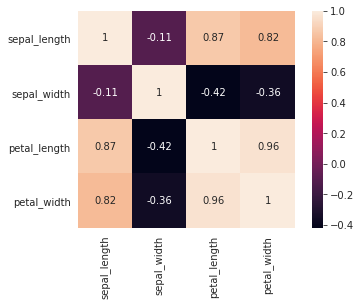

In [16]:
sns.heatmap(data.corr(),annot=True,square=True)
#petal measurements are highly correlated to each other, while sepal_width are least correlated than sepal_length

In [17]:
from sklearn.model_selection import train_test_split

X = data.drop('species', axis=1)
y = data.species

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

y_test.head()

73     Iris-versicolor
18         Iris-setosa
118     Iris-virginica
78     Iris-versicolor
76     Iris-versicolor
Name: species, dtype: object

In [18]:
#will use KNN, decision tree, random forest, svm

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier

knn = KNeighborsClassifier(5)
svm = SVC()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()

ens = VotingClassifier(estimators = [('KNN', knn),('SVM', svm), ('DT', dt), ('RF', rf)], voting = 'hard')

ens.fit(X_train, y_train)
pred = ens.predict(X_test)

In [24]:
from sklearn.metrics import precision_score, accuracy_score, f1_score

print('Precision score: ', precision_score(y_test, pred, average='micro'))
print('Accuracy score: ', accuracy_score(y_test, pred))

Precision score:  1.0
Accuracy score:  1.0
